#### https://www.kaggle.com/uciml/mushroom-classification

- 앙상블(Ensemble) : 결정트리 기반 알고리즘 
    - 여러 모델을 결합해서 최종 예측 값을 생성(다수결, )
    - 각 모델은 상관관계가 적어야 한다
- 앙상블 종류
1. Voting : 
    - 서로 다른 알고리즘 가진 분류기를 결합, 사이킷런은 VotingClassifier 클래스를 제공함
    - <1> 하드보팅(Hard Voting) : 분류기들이 예측한 결과 값을 다수결로 결정
    - <2> 소프트 보팅(Soft Voting) : 각 분류기들이 예측값을 확률로 구하면 이를 평균 내어 확률이 가장 높은 값을 결과 값으로 결정

2. Bagging : 
    - 같은 유형의 알고리즘을 결합, 데이터 샘플링시 서로 다르게 가져가면서 학습, RandomForest 가 대표적, Bootstrapping Aggregation 줄임말
    - ( Bootstrapping : 여러개의 데이터 세트를 중첩되게 분리하는 분할 방식 )
    - 과대적합을 억제한다 variant를 낮춘다
    - 여러 개의 모델에서 하나의 모델을 샘플로 추출한다고 가정해 보자 
        - 각 모델의 분산은 평균을 나타내기 때문에 최종 모델의 분산보다 값이 떨어진다 그래서 variant를 낮추는 역할을 하게 된다
    - 결정트리는 데이터의 분할이 다르거나 약간의 학습 데이터가 차이가 있으면 결과가 바뀐다
        - bagging을 사용해서 variant를 낮추고 과적합을 낮춰서 해결한다
    - 병렬 복수 모델
    
3. Boosting : 
    - 여러개의 분류기가 순차적으로 학습하면서 가중치를 부스팅한다, XGBoost(캐글 대회 상위 석권),LightGBM
    - 학습시에는 부트스트랩 하지 않고 학습 데이터로 학습시킨다
        - 단, 가중치가 있기 때문에 학습데이터를 그대로 사용하는 것은 아니다라고 해석한다
    - 특징 : variant,  bias 모두 낮춘다
    - 직렬 복수 모델

4. Stacking 기법 : 
    - 위의 여러개의 개별적 모델을 학습하여 예측한 데이터 세트를 사용하여 최종 메타 모델이 학습 예측
    - 복수 단계로 나누어서 학습 또는 예측하는 기법
    - 학습 데이터를 복수 모델로 구축( 배깅 또는 부스팅이르로 앙상블 학습 모델 결과)
    - 각 모델의 예측값(출력값): 특징량을 학습 데이터로 추가 모델을 만들어 실행

from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor 

- 정리
- 앙상블학습은 서로 상관 관계가 약한 모델학습기를 조합해서 높은 정밀도를 구축하는 알고리즘
- 배깅
    - 부트스트랩을 이용해서 추출한 여러 데이터 그룹에 대한 학습모델을 결합(병렬)하는 기술이다
    - variant를 억제할 수 있으므로 일반적으로 variant가 높은 결정트리 알고리즘에 사용된다
- 부스팅
    - 모델이 예측을 잘못된 데이터에 가중치를 부여하고 반복적으로 학습하여 궁극적으로 여러 모델에 가중치를 부여하는 예측 알고리즘이다
    - 부스팅을 사용하면 variant와 bias를 모두 낮출 수 있고 배깅보다 높은 정확도를 기대 할 수 있다
- 스태킹
    - 복수의 모델의 예측치를 새로운 특징량으로 다른 모델을 학습시켜 예측하는 알고리즘이다


#### 랜덤포레스트(RandomForest)
- 의사 결정 트리 기반(Decision Tree) 기반 분류 알고리즘
    - Decision Tree는 분류 / 회귀 다 있음
- 앙상블(Ensemble), 같은 결정트리를 여러개 사용, 비교적 빠른 수행
- 현재의 랜덤 포레스트의 개념은 레오 브레이먼(Leo Breimen)의 논문에서 만들어짐, 
    - 이 논문은 랜덤 노드 최적화(Randomized Node Optimization,RNO)와 
    - 배깅(bagging)을 결합한 방법과 같은 CART(Classification And Regression Tree)를 사용해 상관관계가 없는 트리들로 포레스트를 구성하는 방법을 제시했다

- 분류기준 
    - 불순도 / 불확실성 : 
        - DecisionTree 에서 분기를 정하는 기준
            - 기준값 : 분기 후 하위 노드내에서 동질성이 있는 하위노드간의 이질성이 커지도록 선택
            - 동질성이 증가하면 순도(purity)가 증가하고 불순도가 감소한다
            - 이질성이 증가하면 순도가 감소하고 불순도가 증가한다
            - 정보 획득(infomation gain) : 순도가 증가하고 불확실성이 감소함
            - 순도(purity) 계산 방법 : 엔트로피 지수, 지니계수, 카이제곱 통계량, 분산 감소량 등
            - ML : 엔트로피 지수, 지니 계수
                - 예시) 사슴, 학, 소, 사슴, 학, 학, 사슴, 기린 8개
                - [높은 이질성, 낮은 순수도]
                - 지니계수 G = 1-(3/8)**2 - (3/8)**2 - (1/8)**2 - (1/8)**2  = 0.69
                - [낮은 이질성, 높은 순수도]
                - 지니계수 G = 1-(7/8)**2  - (1/8)**2  = 0.24
    - 엔트로피 지수 : 
        - 무질서도를 정량화해서 표현한 값
        - 어떤 집합의 엔트로피가 높을수록 그 집단의 특징을 찾는 것이 어렵다
    - 지니 계수 
        - 집합에 이질적인 것이 얼마나 섞여있는지 측정하는 지표 
        - 어떤 집합에서 하나를 무작위로 뽑아서 클래스를 추정할 때 틀릴 확률
    

$$G=\sum^{K}_{k=1}p(k)(1-p(k))$$
$$G=\frac{1}{4}(1-\frac{1}{4})+\frac{3}{4}(1-\frac{3}{4})=0.375$$

In [1]:
#RandomForestClassifier() 
# # 계산 복잡 성능 대비 예측률이 좋다 - 지도 분류학습 (시장조사, 광고조사, 의학연구, 품질관리)
# RandomForestClassifier(
#     n_estimators=100, (결정트리의 갯수, default=100, 많을 수록 좋은 성능을 기대할수 있지만
#                         속도가 느려진다)
#     criterion='gini',
#     max_depth=None,   (트리의 최대 깊이, 결정트리의 파라메터와 동일)
#     min_samples_split=2,(노드를 분할하기 위한 최소한의 샘플 수,default=2,과적합 제어에 사용,결정트리의 파라메터와 동일)
#     min_samples_leaf=1,(leaf 노드가 되기 위한 최소한의 샘플 수,default=1,결정트리의 파라메터와 동일)
#     min_weight_fraction_leaf=0.0,
#     max_features='auto', (최적의 분할을 위해 고려할 최대 피쳐 갯수,결정트리의 파라메터와 동일)
#     max_leaf_nodes=None, (리프노드의 최대 갯수, 결정트리의 파라메터와 동일)
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,      (병렬처리 CPU의 갯수, -1이면 전체 CPU 모두 사용)
#     random_state=None,(랜덤 seed 설정 값)
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
# )

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

### DecisionTreeClassifier

In [4]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)



In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

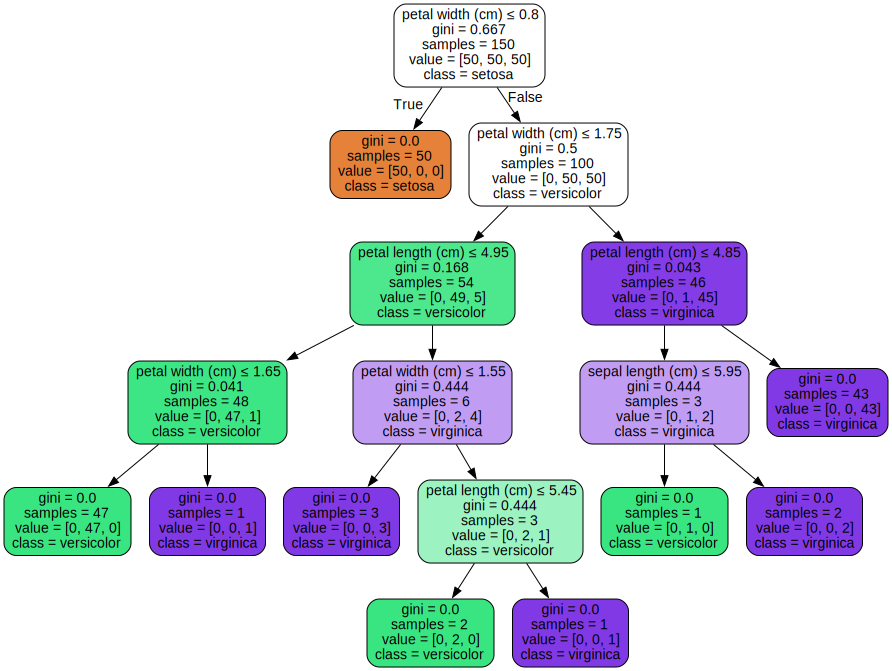

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [9]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])